In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

/home/apk/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
eeg=h5py.File("ME_12_P_2019.02.21_16.24.11.hdf5",mode='r')
keys2= list(eeg.keys())
print keys2
keys1= list(eeg[keys2[0]].keys())
print keys1
#print eeg[keys2[0]][keys1[0]]
#eeg["RawData"]['Samples']
print list(eeg['RawData'].keys())
print eeg['RawData']['Samples']
sampletime = np.array(eeg['AsynchronData']["Time"])
time=sampletime/256.0
sampletime1=np.delete(sampletime, len(sampletime)-1)
sampletime1=np.delete(sampletime1, 0)
print sampletime

[u'AsynchronData', u'RawData', u'SavedFeatues', u'Version']
[u'AsynchronSignalTypes', u'Time', u'TypeID', u'Value']
[u'AcquisitionTaskDescription', u'DAQDeviceCapabilities', u'DAQDeviceDescription', u'Samples', u'SessionDescription', u'SubjectDescription']
<HDF5 dataset "Samples": shape (33045, 64), type "<f4">
[17621 21006 25201 27736 30541]


In [3]:
samples=np.array(eeg['RawData']['Samples'])
samples=samples.T
sf=[]
ts=[]
for s in sampletime1:
    sample=[]
   
    for j in range (0, len(samples)):
        sample.append(samples[j][s-384:s+512])
        
    sf.append(sample)
    ts.append(np.arange(s-384, s+512))

In [4]:

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

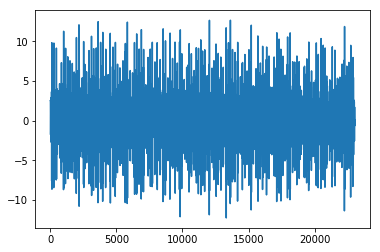

In [5]:
import scipy.signal as signal
alpha=[]
beta=[]
gamma=[]
delta=[]
theta=[]
freq=[[0.5, 4], [4, 8], [8, 15], [12, 30], [30, 100]]
fs=256
order=3


for i in range (0, len(samples)):
    b, a = butter_bandpass(0.1, 100, fs, order=order)
    samples[i]=(signal.filtfilt(b, a, samples[i], padlen=0))
    #samples[0][13250:13500]=signal.filtfilt(b, a, samples[0][13250:13500], padlen=0)
    b, a = butter_bandpass(freq[0][0], freq[0][1], fs, order=order)
    delta.append(signal.filtfilt(b, a, samples[i], padlen=10))
    b, a = butter_bandpass(freq[1][0], freq[1][1], fs, order=order)
    theta.append(signal.filtfilt(b, a, samples[i], padlen=10))
    b, a = butter_bandpass(freq[2][0], freq[2][1], fs, order=order)
    alpha.append(signal.filtfilt(b, a, samples[i], padlen=10))
    b, a = butter_bandpass(freq[3][0], freq[3][1], fs, order=order)
    beta.append(signal.filtfilt(b, a, samples[i], padlen=10))
    b, a = butter_bandpass(freq[4][0], freq[4][1], fs, order=order)
    gamma.append(signal.filtfilt(b, a, samples[i], padlen=10))
    
plt.plot(np.arange(len(alpha[60])-10000), alpha[60][10000:])
#print len(avgarr)

In [6]:
alpha=[]
b, a = butter_bandpass(8, 10, fs, order=order)
for i in range (0, len(samples)):
    alpha.append(signal.filtfilt(b, a, samples[i], padlen=0))
    print alpha[i]

[1.10774543e+03 1.94417740e+03 2.68517628e+03 ... 3.16840931e-06
 2.48763395e-07 2.61208020e-16]
[1.24813356e+03 2.00782705e+03 2.66894280e+03 ... 3.31223914e-05
 4.23072889e-06 1.36785657e-16]
[1.85365188e+03 2.30572766e+03 2.64451299e+03 ... 3.85276765e-04
 4.93626718e-05 5.10340739e-16]
[1.09170475e+03 1.93414414e+03 2.68164966e+03 ... 3.53850190e-05
 4.53026197e-06 6.45862622e-17]
[ 7.94623281e+02  1.78973031e+03  2.69703088e+03 ...  2.85391514e-05
  3.68544347e-06 -1.46149182e-17]
[9.69545623e+02 1.87368891e+03 2.68587486e+03 ... 3.75163240e-05
 4.80702715e-06 9.55859740e-17]
[1.44152902e+03 2.10464410e+03 2.66440154e+03 ... 3.50343945e-05
 4.44211114e-06 1.84653183e-16]
[ 8.99413021e+02  1.83693579e+03  2.68432038e+03 ... -8.48159886e-06
 -1.25820899e-06  2.87303411e-16]
[ 1.19172277e+03  1.98523062e+03  2.68128137e+03 ... -5.17148044e-05
 -6.38787848e-06 -6.75695123e-16]
[ 1.48831544e+03  2.13753457e+03  2.68177961e+03 ...  1.61655816e-05
  2.16304199e-06 -1.72999703e-16]
[ 1.09

In [7]:
power=[]
mav=[]
var=[]
for i in range (0, len(alpha[0])-128):
    freqs, psd = signal.welch(alpha[1][i:i+128])
    power.append(np.sqrt(max(psd)))
    mav.append(np.mean(np.abs(alpha[1][i:i+128])))
    #sigsq=np.mean((samples[0][i:i+128]-np.mean(samples[0][i:i+128]))**2)
    sigsq=np.mean(alpha[1][i:i+128])**2
    var.append(sigsq)

/home/apk/anaconda2/lib/python2.7/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  .format(nperseg, input_length))


In [8]:
print power

[11922.50504349878, 11723.660396055317, 11525.49109059313, 11327.646428835606, 11129.700163979816, 10931.247649336305, 10731.997305344774, 10531.83948081064, 10330.880359332607, 10129.435248992706, 9927.98312423911, 9727.091338491215, 9527.324791464183, 9329.156581356305, 9132.896771407184, 8938.652364555575, 8746.32553213117, 8555.649759007034, 8366.256350524165, 8177.758168105944, 7989.834596738001, 7802.302035536224, 7615.157400513413, 7428.587458999431, 7242.94320200997, 7058.684759201146, 6876.307523997273, 6696.263344811656, 6518.891310105202, 6344.370661136351, 6172.704032570453, 6003.733358751426, 5837.184566702913, 5672.73188323894, 5510.069268656443, 5348.975721194924, 5189.362950361016, 5031.2976573039505, 4874.995541837774, 4720.789248395349, 4569.076918844517, 4420.261162379654, 4274.689620509257, 4132.6076912536255, 3994.131478942936, 3859.245095581021, 3727.8218124226464, 3599.6641820088307, 3474.555011853601, 3352.309577905282, 3232.819890064493, 3116.0838958370855, 300

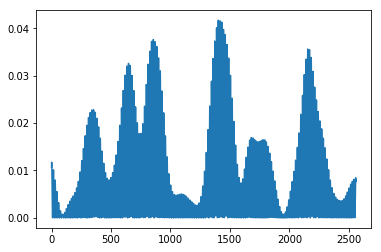

In [9]:
plt.plot(np.arange(256*10), var[29261:31821])

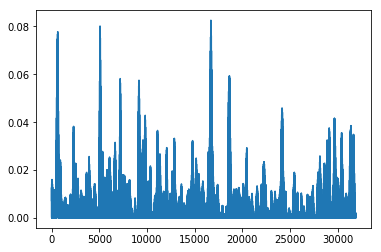

In [10]:
plt.plot(np.arange(len(var)-1024), var[1024:])

In [27]:
power1=[]
mav=[]
var=[]
for i in range (0, len(samples[0])-256, 32):
    freqs, psd = signal.welch(alpha[0][i:i+128])
    power1.append(np.sqrt(max(psd)))
    mav.append(np.mean(np.abs(samples[0][i:i+250])))
    sigsq=np.mean((samples[0][i:i+250]-np.mean(samples[0][i:i+250]))**2)
    var.append(sigsq)

In [28]:
print len(power1)

1025


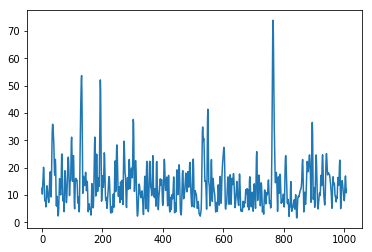

In [31]:
plt.plot(np.arange(len(power1)-16), power1[16:])

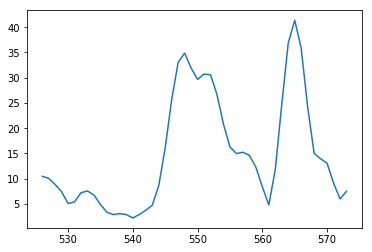

In [41]:
plt.plot(np.arange(sampletime1[0]/32-256*3/32, sampletime1[0]/32+256*3/32, 1), power1[sampletime1[0]/32-256*3/32:sampletime1[0]/32+256*3/32])

In [43]:
print np.arange(sampletime1[0]/32-256*3/32, sampletime1[0]/32+256*3/32, 1), sampletime1[0]/32

[526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543
 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561
 562 563 564 565 566 567 568 569 570 571 572 573] 550


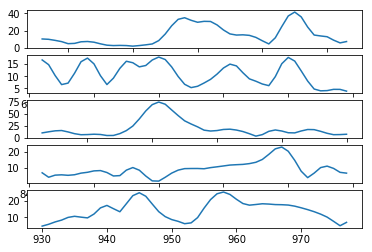

In [46]:
fig, axs=plt.subplots(len(sampletime1))
for i in range (0, len(sampletime1)):
    axs[i].plot(np.arange(sampletime1[i]/32-256*3/32, sampletime1[i]/32+256*3/32, 1), power1[sampletime1[i]/32-256*3/32:sampletime1[i]/32+256*3/32])